In [1]:
%pylab inline

import libaarhusxyz
import simpegsimpleem


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Right handed coordinate system. x is forward, y to the right, z down

## Load the data from disk
generated by seperate notebook

In [2]:
xyz = libaarhusxyz.XYZ("outputs/em1dtm_stitched_data.xyz")

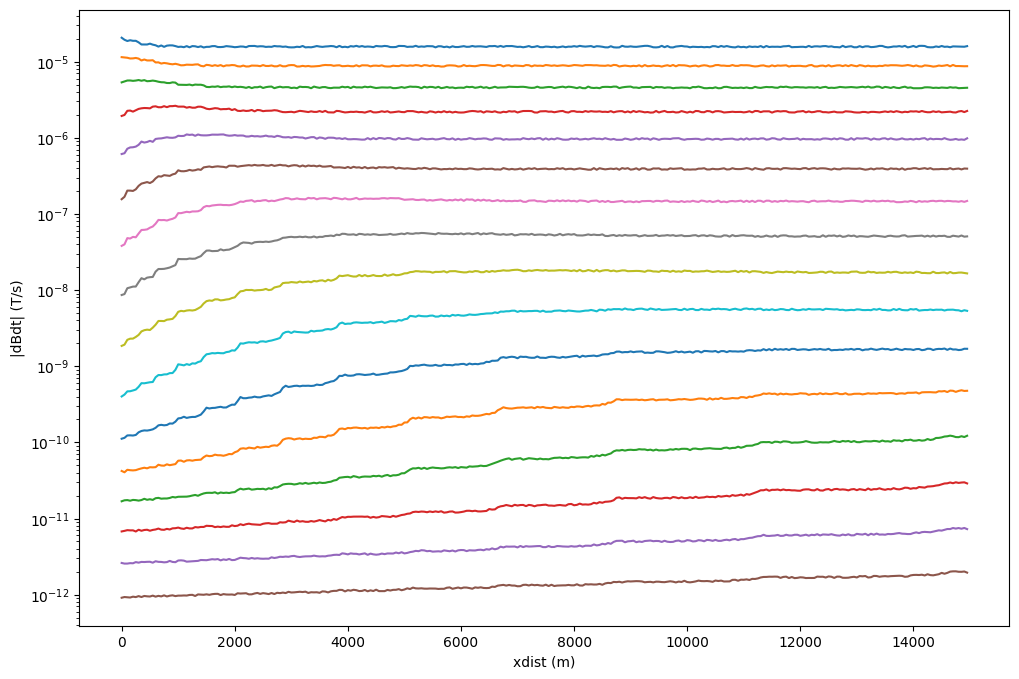

In [3]:
plt.figure(figsize=(12, 8))
xyz.plot_line(0, ax=plt.gca())
plt.show()

In [12]:
len(xyz.flightlines)

300

# Define the instrument

In [4]:
class MySystem(simpegsimpleem.SingleRecvTEMXYZSystem):
    area=340
    i_max=1
    alpha_s = 1e-10
    alpha_r = 100.
    alpha_z = 1.


## Do the inversion

In [5]:
inv = MySystem(xyz)
try:
    xyzsparse, xyzl2 = inv.invert()
except Exception as e:
    print(e)
    import sys, pdb
    sys.last_traceback = sys.exc_info()[2]
    pdb.pm()

>> Use multiprocessing for parallelization
>> n_cpu: 3
model has any nan: 0
============================ Inexact Gauss Newton ============================
  #     beta     phi_d     phi_m       f      |proj(x-g)-x|  LS    Comment   
-----------------------------------------------------------------------------
x0 has any nan: 0


/home/redhog/Projects/Emerald/paper-raw-em-interpretation/env/lib/python3.8/site-packages/discretize/base/base_tensor_mesh.py:1025: FutureWarning: hx has been deprecated, please access as mesh.h[0]
  warnings.warn(
/home/redhog/Projects/Emerald/paper-raw-em-interpretation/env/lib/python3.8/site-packages/discretize/utils/code_utils.py:182: FutureWarning: TensorMesh._cellGradStencil has been deprecated, please use TensorMesh.stencil_cell_gradient. It will be removed in version 1.0.0 of discretize.
  warnings.warn(message, Warning)


   0  1.36e-01  3.41e+05  0.00e+00  3.41e+05    6.86e+03      0              
   1  6.81e-02  5.25e+04  4.50e+04  5.56e+04    4.61e+03      1              
   2  3.40e-02  2.16e+04  9.25e+04  2.48e+04    5.45e+03      0   Skip BFGS  
   3  1.70e-02  3.62e+03  1.00e+05  5.33e+03    9.99e+02      0              
Reached starting chifact with l2-norm regularization: Start IRLS steps...
eps_p: 1.6467080790722695 eps_q: 1.6467080790722695
>> Fix Jmatrix
   4  8.51e-03  1.34e+03  1.27e+05  2.43e+03    3.69e+02      0   Skip BFGS  
>> Fix Jmatrix
   5  2.03e-02  8.68e+02  1.43e+05  3.76e+03    4.18e+02      0   Skip BFGS  
>> Fix Jmatrix
   6  4.47e-02  9.95e+02  1.21e+05  6.42e+03    3.35e+02      0              
>> Fix Jmatrix
   7  7.07e-02  2.07e+03  9.44e+04  8.74e+03    5.57e+02      0              
>> Fix Jmatrix
   8  5.26e-02  3.25e+03  7.73e+04  7.31e+03    5.43e+02      0              
>> Fix Jmatrix
   9  8.71e-02  1.83e+03  9.20e+04  9.85e+03    4.61e+02      0              
>> F

# Plot the results

In [6]:
import importlib
importlib.reload(libaarhusxyz.xyz)
importlib.reload(libaarhusxyz)
importlib.reload(simpegsimpleem)

<module 'simpegsimpleem' from '/home/redhog/Projects/Emerald/experimental-simpeg-ext/simpegsimpleem/__init__.py'>

(-200.0, 0.0)

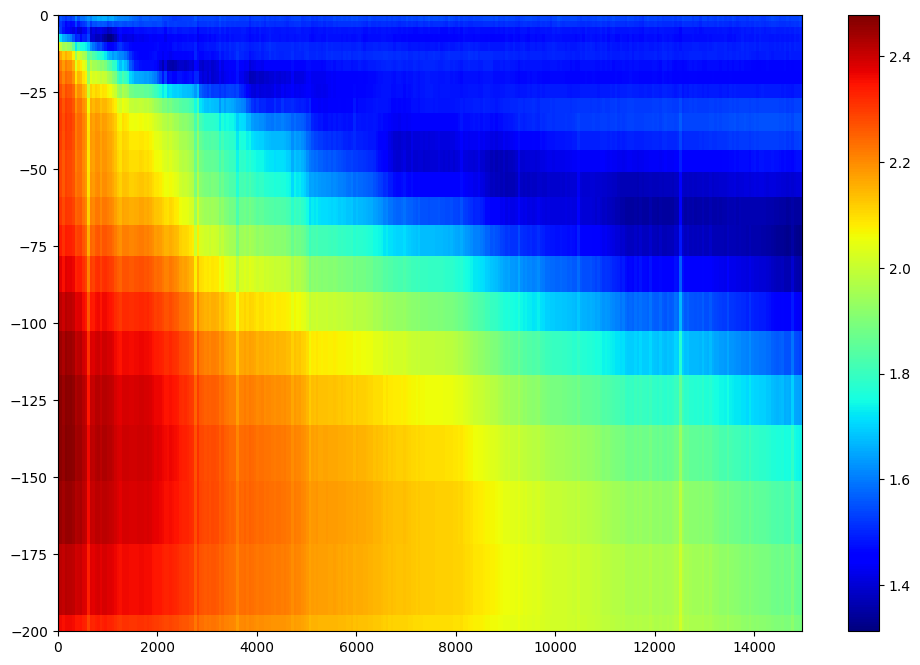

In [7]:
fig = plt.figure(figsize=(12, 8))
ax=plt.gca()
xyzsparse.plot_line(0, ax=ax, cmap="jet")
fig.colorbar(mappable=ax.collections[0])
ax.set_ylim(-200, 0)

(-200.0, 0.0)

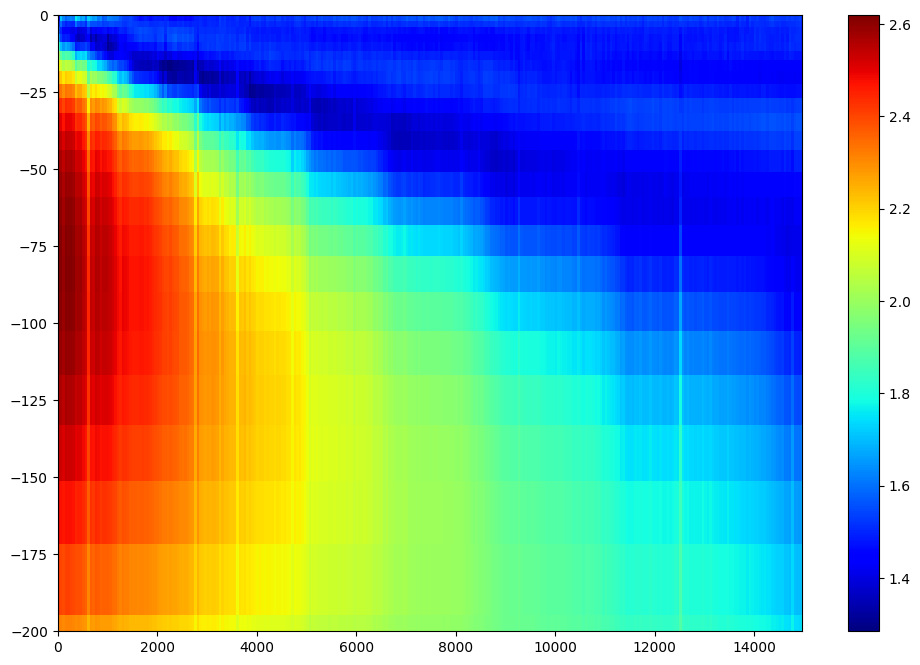

In [8]:
fig = plt.figure(figsize=(12, 8))
ax=plt.gca()
xyzl2.plot_line(0, ax=ax, cmap="jet")
fig.colorbar(mappable=ax.collections[0])
ax.set_ylim(-200, 0)

In [9]:
xyzl2fwd = MySystem(xyzl2, times=inv.times).forward()
xyzsparsefwd = MySystem(xyzsparse, times=inv.times).forward()

>> Use multiprocessing for parallelization
>> n_cpu: 3
>> Use multiprocessing for parallelization
>> n_cpu: 3


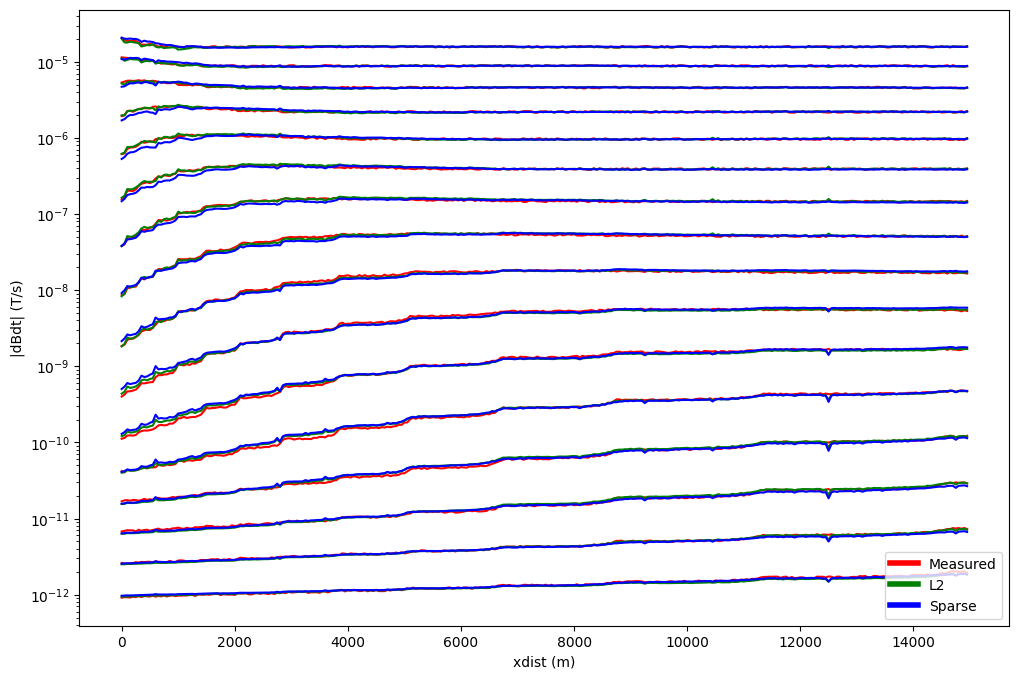

In [10]:
fig = plt.figure(figsize=(12, 8))
ax=plt.gca()
xyz.plot_line(0, ax=ax, c="red", label="measured %(gate)i @ %(time).2e")
xyzl2fwd.plot_line(0, ax=ax, c="green", label="fwd %(gate)i @ %(time).2e")
xyzsparsefwd.plot_line(0, ax=ax, c="blue", label="fwd %(gate)i @ %(time).2e")
ax.legend([matplotlib.lines.Line2D([0], [0], color="red", lw=4),
           matplotlib.lines.Line2D([0], [0], color="green", lw=4),
           matplotlib.lines.Line2D([0], [0], color="blue", lw=4)],
          ['Measured', 'L2', "Sparse"])
plt.show()

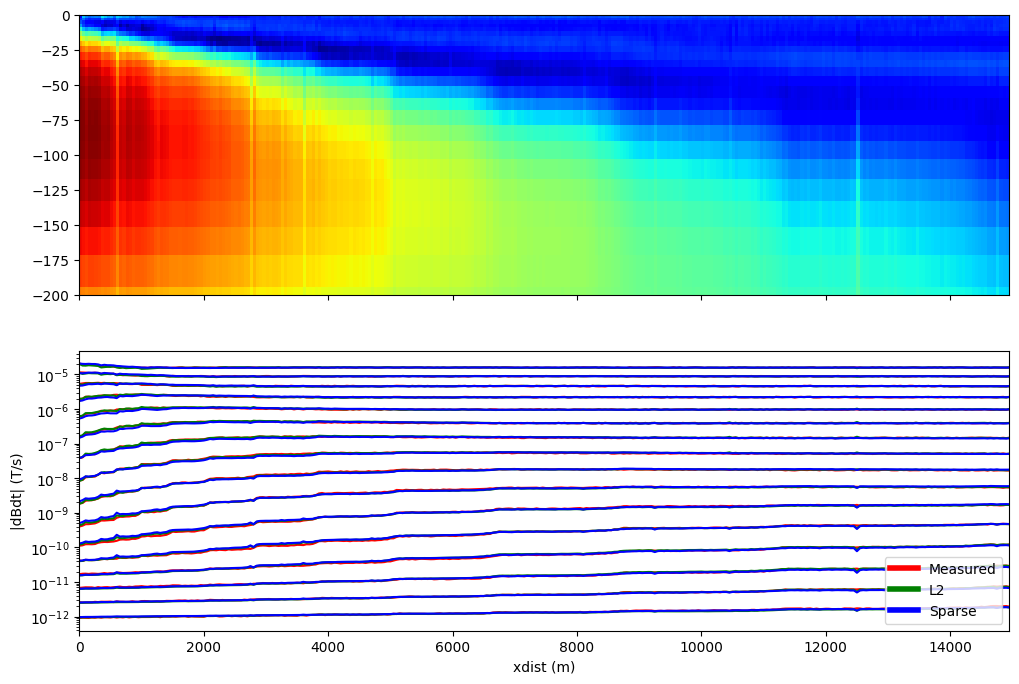

In [11]:
fig = plt.figure(figsize=(12, 8))
axs = fig.subplots(2, 1, sharex=True)
xyzl2.plot_line(0, ax=axs[0], cmap="jet")
axs[0].set_ylim(-200, 0)

xyz.plot_line(0, ax=axs[1], c="red", label="measured %(gate)i @ %(time).2e")
xyzl2fwd.plot_line(0, ax=axs[1], c="green", label="fwd %(gate)i @ %(time).2e")
xyzsparsefwd.plot_line(0, ax=axs[1], c="blue", label="fwd %(gate)i @ %(time).2e")
axs[1].legend([matplotlib.lines.Line2D([0], [0], color="red", lw=4),
           matplotlib.lines.Line2D([0], [0], color="green", lw=4),
           matplotlib.lines.Line2D([0], [0], color="blue", lw=4)],
          ['Measured', 'L2', "Sparse"])
plt.show()